In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline
import math

In [4]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [6]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [9]:
def run_on_simulators(circuit):
    statevec_job = execute(circuit, backend=statevector_simulator)
    result = statevec_job.result()
    statevec = result.get_statevector()
    
    num_qubits= circuit.num_qubits
    
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])
    
    qasm_job = execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [10]:
circuit = QuantumCircuit(2,2)
statevec, counts = run_on_simulators(circuit)

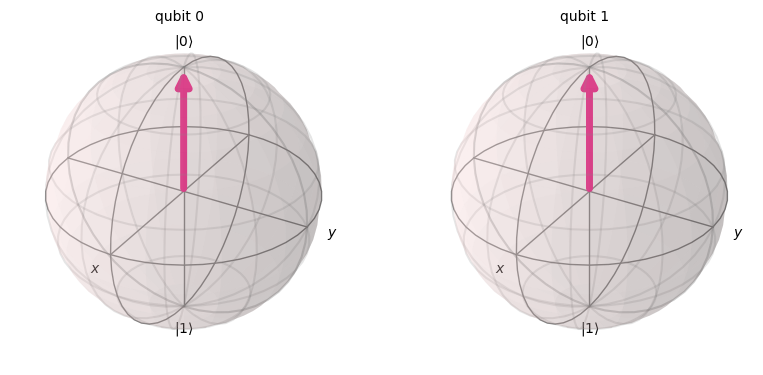

In [11]:
plot_bloch_multivector(statevec)

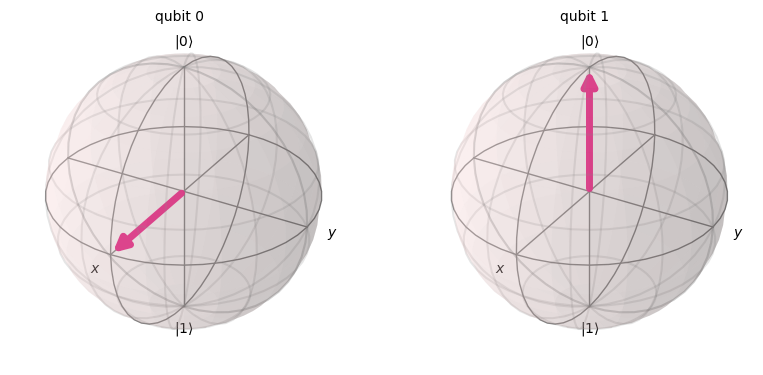

In [12]:
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

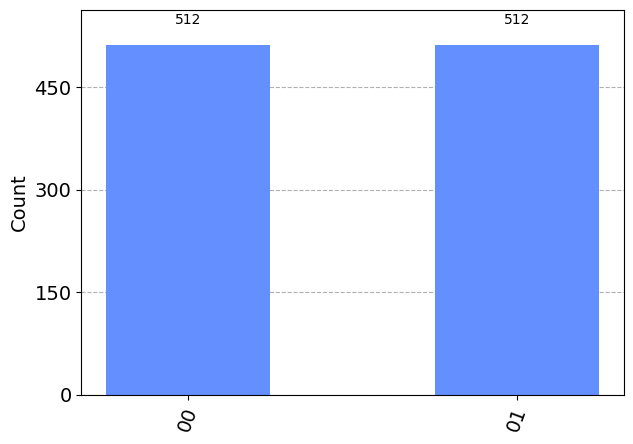

In [14]:
plot_histogram([counts])

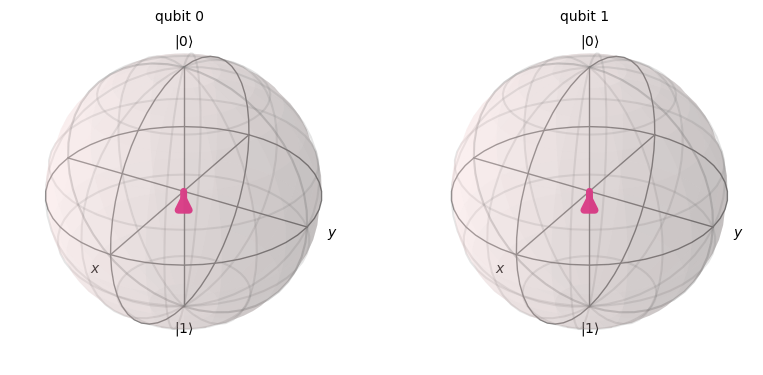

In [15]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

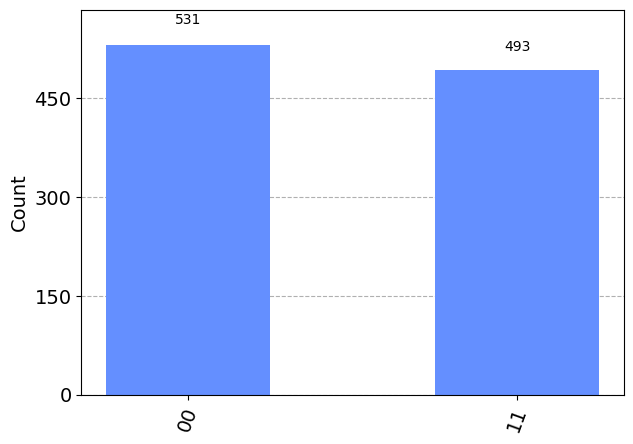

In [16]:
plot_histogram([counts])

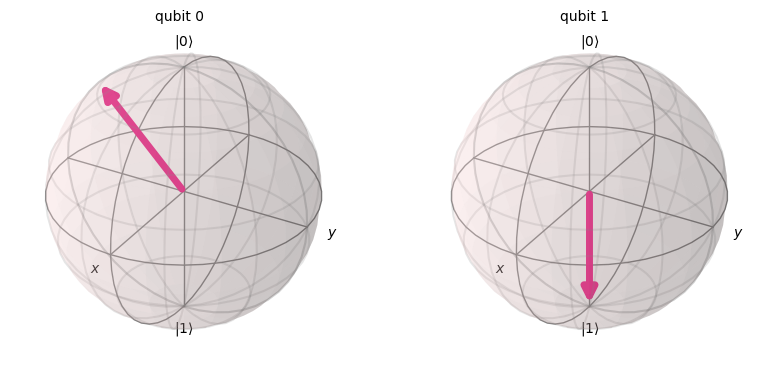

In [19]:
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4, 0)
circuit.rx(math.pi, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

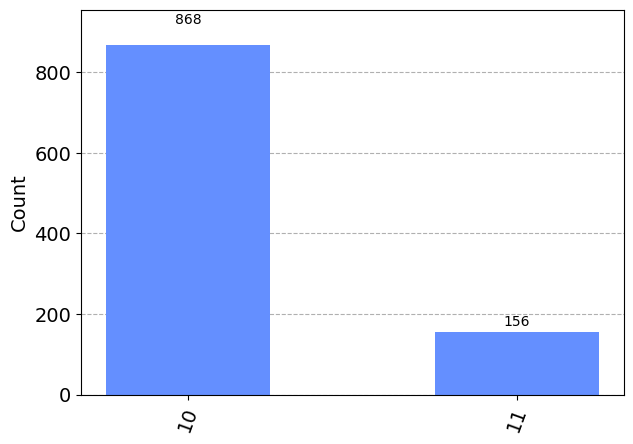

In [20]:
plot_histogram([counts])

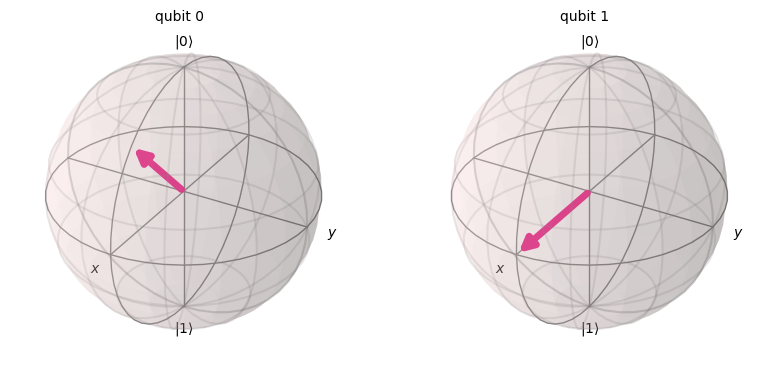

In [21]:
circuit = QuantumCircuit(2,2)
circuit.ry(math.pi/4, 0)
circuit.ry(math.pi/2, 1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

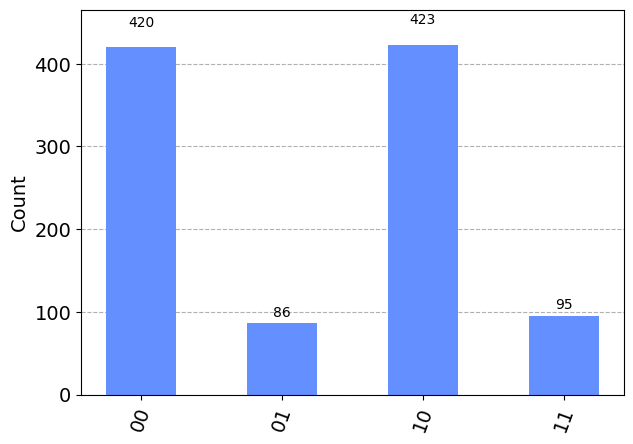

In [22]:
plot_histogram([counts])

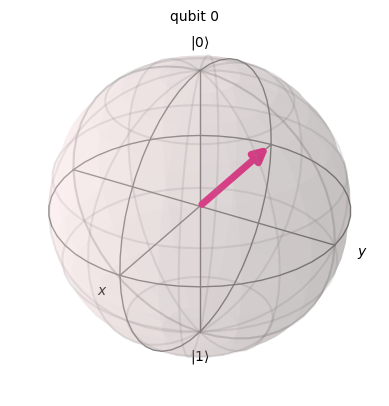

In [25]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

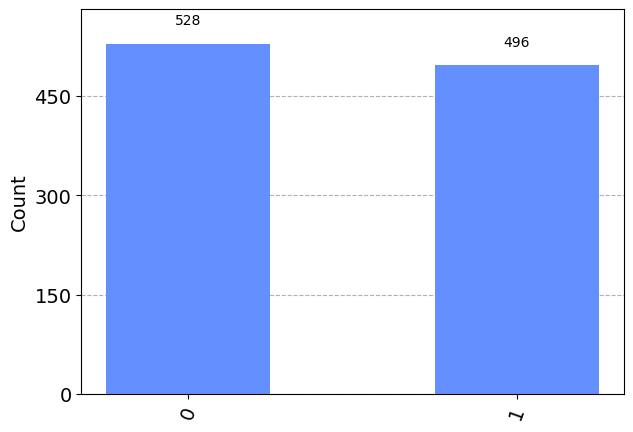

In [26]:
plot_histogram([counts])

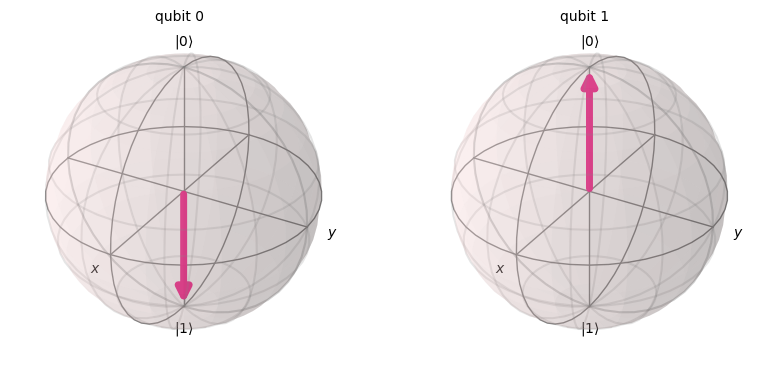

In [30]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.z(0)
circuit.cx(0,1)
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

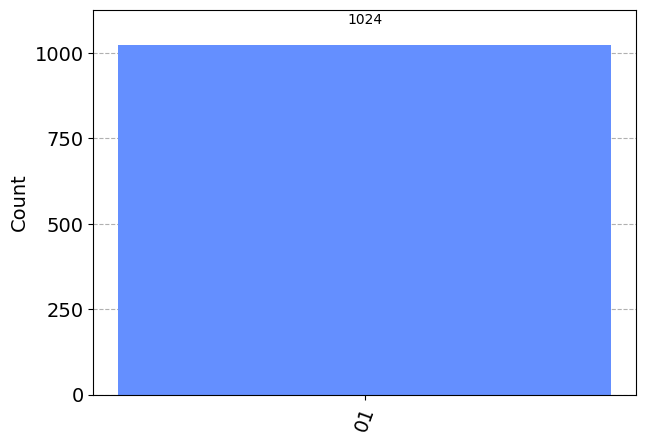

In [31]:
plot_histogram([counts])